11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


C:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 27ms/step - accuracy: 0.9026 - loss: 0.3101 - val_accuracy: 0.9821 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9845 - loss: 0.0478 - val_accuracy: 0.9871 - val_loss: 0.0401
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 31ms/step - accuracy: 0.9902 - loss: 0.0307 - val_accuracy: 0.9877 - val_loss: 0.0349
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9926 - loss: 0.0231 - val_accuracy: 0.9900 - val_loss: 0.0313
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9949 - loss: 0.0172 - val_accuracy: 0.9927 - val_loss: 0.0234
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9908 - loss: 0.0295
Test accuracy: 0.9927
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


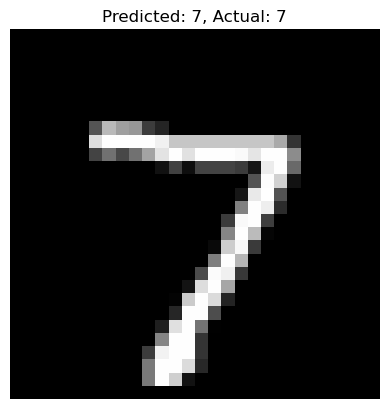

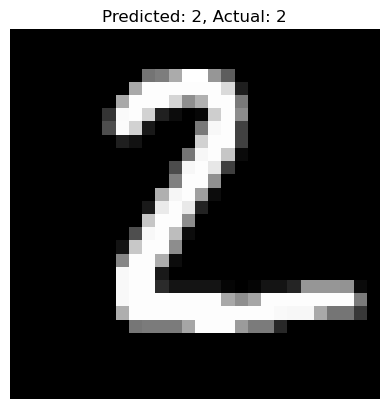

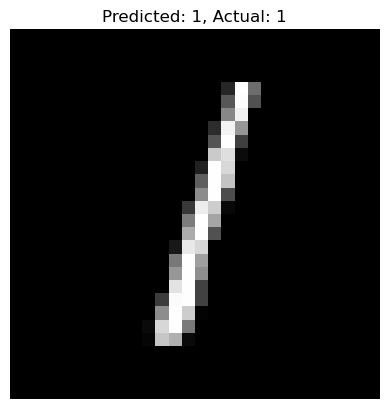

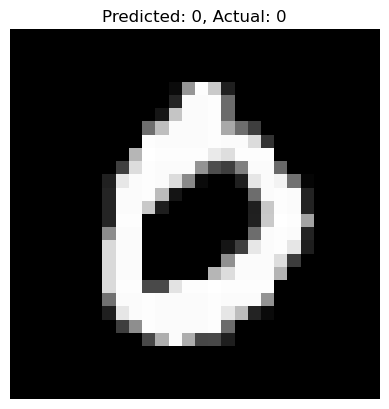

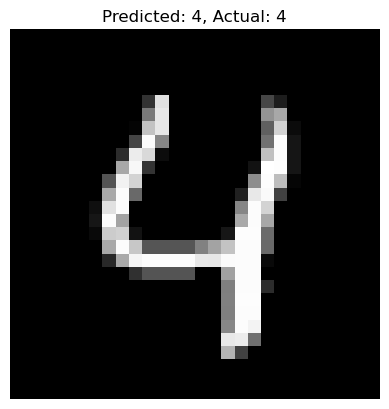

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to add a channel dimension (needed for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(x_test)

# Display some predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()